In [1]:
import sys
import os
sys.path.append('/root/GanLuo/PullSum_MNIST/code/神经网络实验/MNIST最终实验')
import torch
import numpy as np 
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *
from network_func import *
from search_parameter import *
import optuna

In [6]:
n=10
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_10_hard_linear_mix(p1=0.9,seed=49)

A的第二大特征值: 0.88149843072359
A的beta: 0.951212670347466
A的spectral gap: 0.04878732965253396
A的kappa: 2.00000000000001
S_A是: 219.49147627446408 

1.9567e+00, 6.1440e+02


Pull Sum: opt_lr = 8e-3


Pull Diag: opt_lr = 1.8e-3





Training Progress: 100%|██████████| 1000/1000 [07:29<00:00,  2.23it/s, accuracy=83.4700000000%, epoch=1000, loss=1.7360687971]


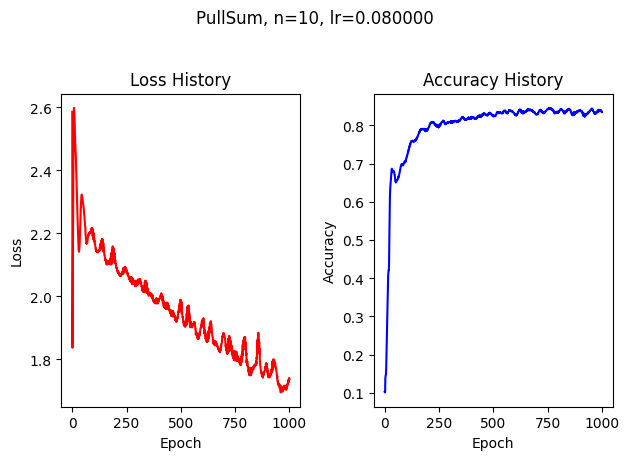

In [8]:
Sum_l2, Sum_a2 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=8e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 1000/1000 [07:33<00:00,  2.21it/s, accuracy=83.6200000000%, epoch=1000, loss=1.7198985934]


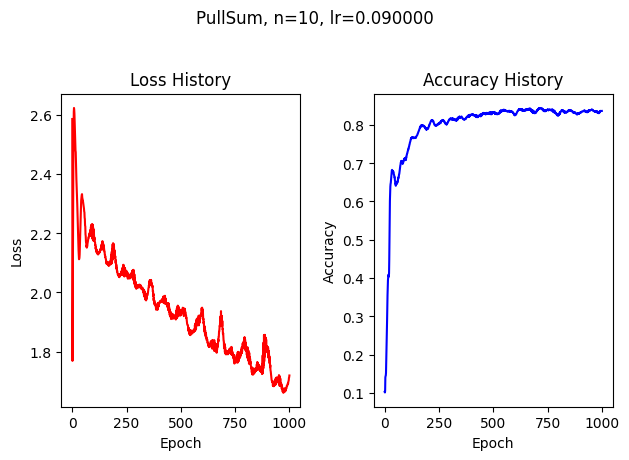

In [15]:
Sum_l3, Sum_a3 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=9e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 1000/1000 [07:26<00:00,  2.24it/s, accuracy=84.5300000000%, epoch=1000, loss=1.7224528313]


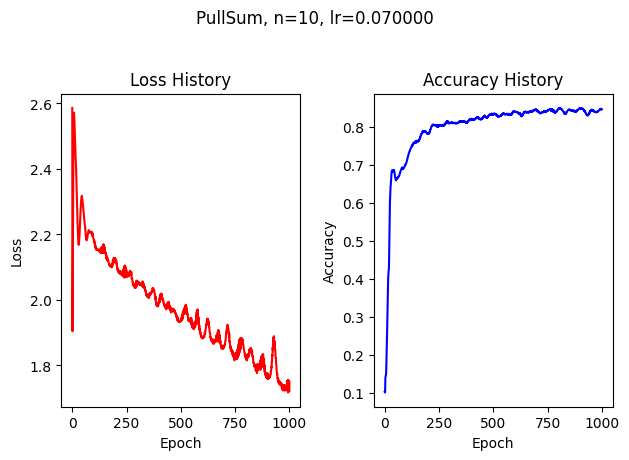

In [16]:
Sum_l4, Sum_a4 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=7e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

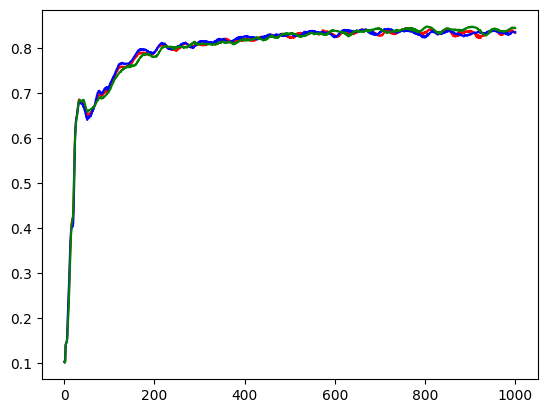

In [17]:
plt.plot(Sum_a2,color='r')
plt.plot(Sum_a3,color='b')
plt.plot(Sum_a4,color='g')
plt.show()

Training Progress: 100%|██████████| 1000/1000 [07:35<00:00,  2.19it/s, accuracy=81.5100000000%, epoch=1000, loss=2.0225031137]


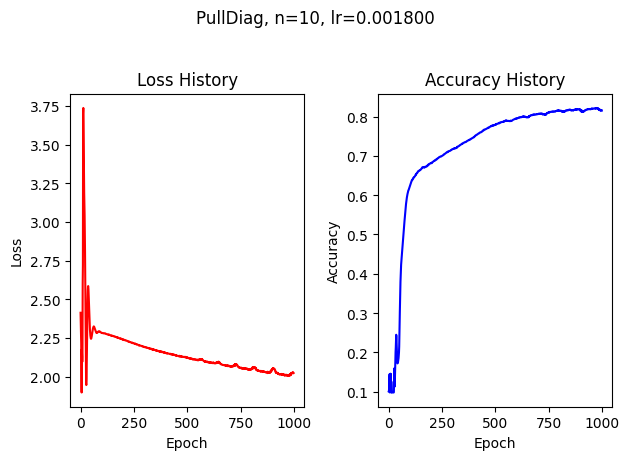

In [10]:
Diag_ll2, Diag_aa2 = train_PullDiag(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=1.8e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 1000/1000 [07:41<00:00,  2.17it/s, accuracy=79.1000000000%, epoch=1000, loss=2.0921333075]


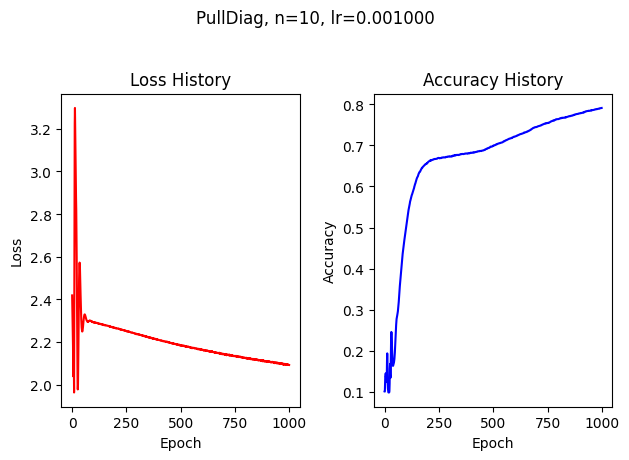

In [18]:
Diag_ll3, Diag_aa3 = train_PullDiag(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=1e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 1000/1000 [07:34<00:00,  2.20it/s, accuracy=80.4900000000%, epoch=1000, loss=1.8977366447]


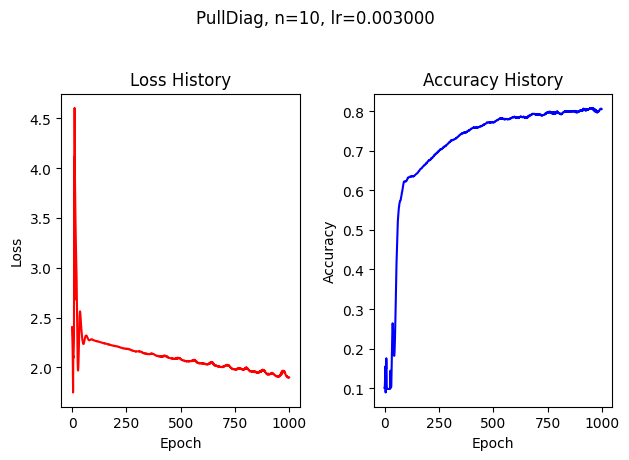

In [19]:
Diag_ll4, Diag_aa4 = train_PullDiag(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=3e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

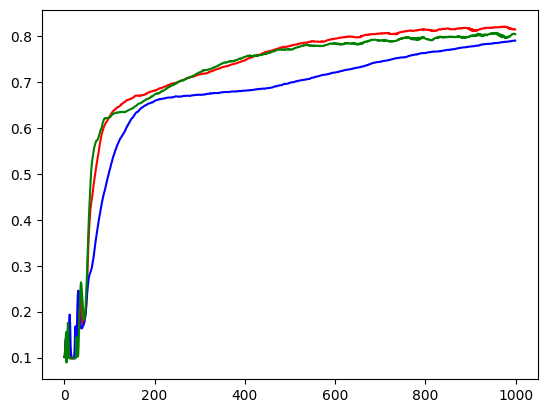

In [20]:
plt.plot(Diag_aa2,color='r')
plt.plot(Diag_aa3,color='b')
plt.plot(Diag_aa4,color='g')
plt.show()

Training Progress: 100%|██████████| 1000/1000 [07:21<00:00,  2.26it/s, accuracy=84.7400000000%, epoch=1000, loss=1.4412616372]


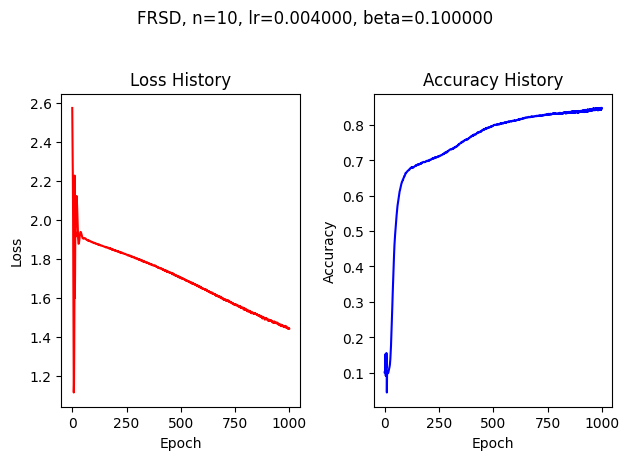

In [23]:
FRSD_ll4, FRSD_aa4= train_FRSD(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=4e-3,
    beta=0.1,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

In [27]:
FROZEN_ll4, FROZEN_aa4= train_FROZEN(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=4e-3,
    beta=0.1,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress:  21%|██        | 212/1000 [01:37<06:11,  2.12it/s, accuracy=38.5300000000%, epoch=212, loss=2.2568920851]

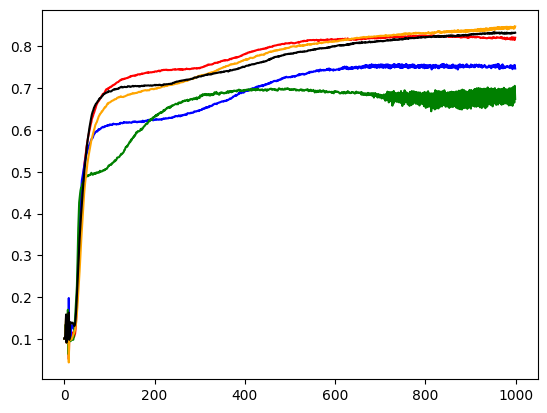

In [25]:
plt.plot(FRSD_aa1,color='r')
plt.plot(FRSD_aa2,color='b')
plt.plot(FRSD_aa3,color='g')
plt.plot(FRSD_aa4,color='orange')
plt.plot(FRSD_aa5,color='black')
plt.show()

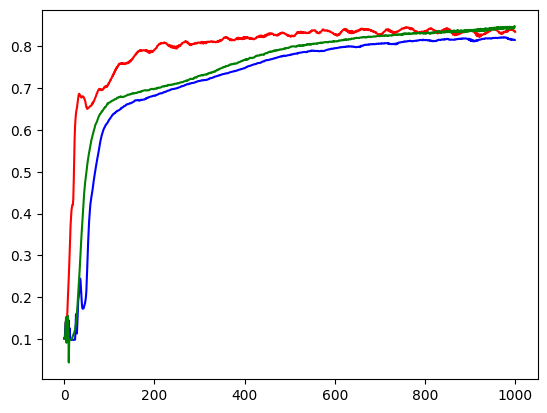

In [26]:
plt.plot(Sum_a2,color='r')
plt.plot(Diag_aa2,color='b')
plt.plot(FRSD_aa4,color='g')
plt.show()